In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [63]:
def conv(image, kernel):
    height, width, _ = image.shape
    n, _ = kernel.shape
    kernel = kernel[:,:,None]
    output = np.zeros((height-n+1, width-n+1, 3))
    for height_step in range(height-n+1):
        for width_step in range(width-n+1):
            output[height_step, width_step] = (kernel*image[height_step:height_step+n, width_step:width_step+n]).sum((0,1))
    return output

In [64]:
def get_kernel(name):
    kernels = {
        "sobel_x": np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]]),
        "sobel_y": np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]]).T,
        "gaussian": np.array([[2,  4,  5,  4, 2],
                              [4,  9, 12,  9, 4],
                              [5, 12, 15, 12, 5],
                              [4,  9, 12,  9, 4],
                              [2,  4,  5,  4, 2]])/159,
    }
    return kernels[name].astype(float)

In [65]:
min_max = lambda x: (x-x.min())/(x.max()-x.min())

In [66]:
image = np.array(Image.open("devansh.png"), dtype=float)[:,:,:3]/255

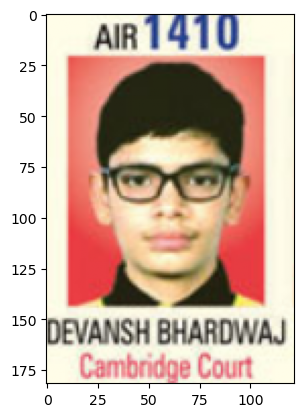

In [67]:
plt.imshow(image)

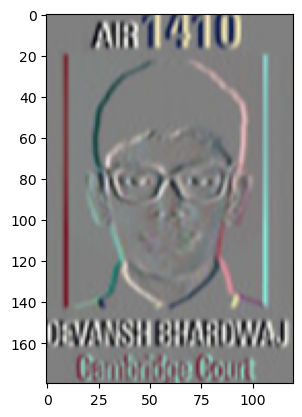

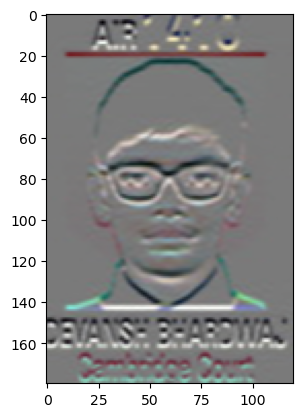

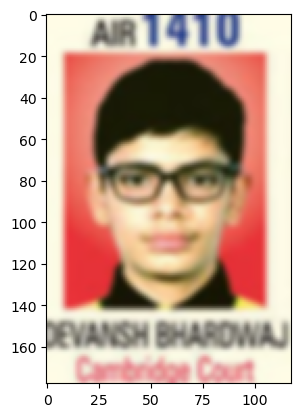

In [68]:
x_filter = conv(image, get_kernel("sobel_x"))
plt.imshow(min_max(x_filter))
plt.show()

y_filter = conv(image, get_kernel("sobel_y"))
plt.imshow(min_max(y_filter))
plt.show()

gauss_filter = conv(image, get_kernel("gaussian"))
plt.imshow(min_max(gauss_filter))
plt.show()

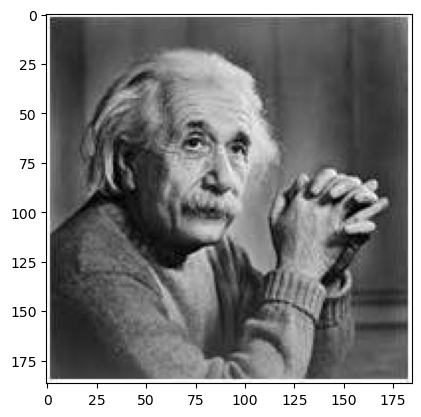

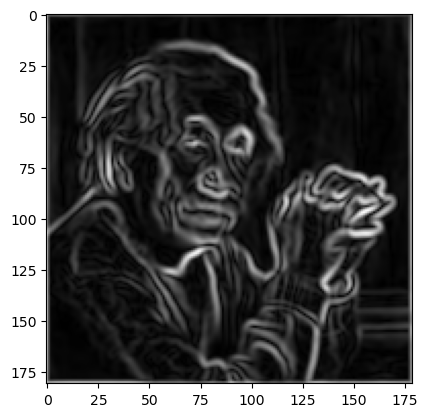

In [70]:
image = np.array(Image.open("lord_einstein.jpg"), dtype=float)[:,:,:3]/255
plt.imshow(image)
plt.show()

image = conv(image, get_kernel("gaussian"))
sobel_x = conv(image, get_kernel("sobel_x"))
sobel_y = conv(image, get_kernel("sobel_y"))

gradient = min_max(np.sqrt(sobel_x**2 + sobel_y**2))
plt.imshow(gradient)